In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ray_results_interpreter as rri
import subprocess
import concurrent.futures
from main_run import MainRun

Error, NaN values found in loss columns /user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware/run_2024-10-31_01-59-43/run_5325d_00103_103_apply_normalization=False,context=256,learning_rate=0.0100,samples=3,store_orders_for_warehouse=False,store_un_2024-10-31_01-59-44: 
Error, NaN values found in loss columns /user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware/run_2024-10-31_01-59-43/run_5325d_00151_151_apply_normalization=False,context=256,learning_rate=0.0100,samples=1,store_orders_for_warehouse=False,store_un_2024-10-31_01-59-44: 
Error, NaN values found in loss columns /user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware/run_2024-10-31_01-59-43/run_5325d_00103_103_apply_normalization=False,context=256,learning_rate=0.0100,samples=3,store_orders_for_warehouse=False,store_un_2024-10-31_01-59-44: 
Error, NaN values found in loss columns /user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/symmetry_aware/run_2

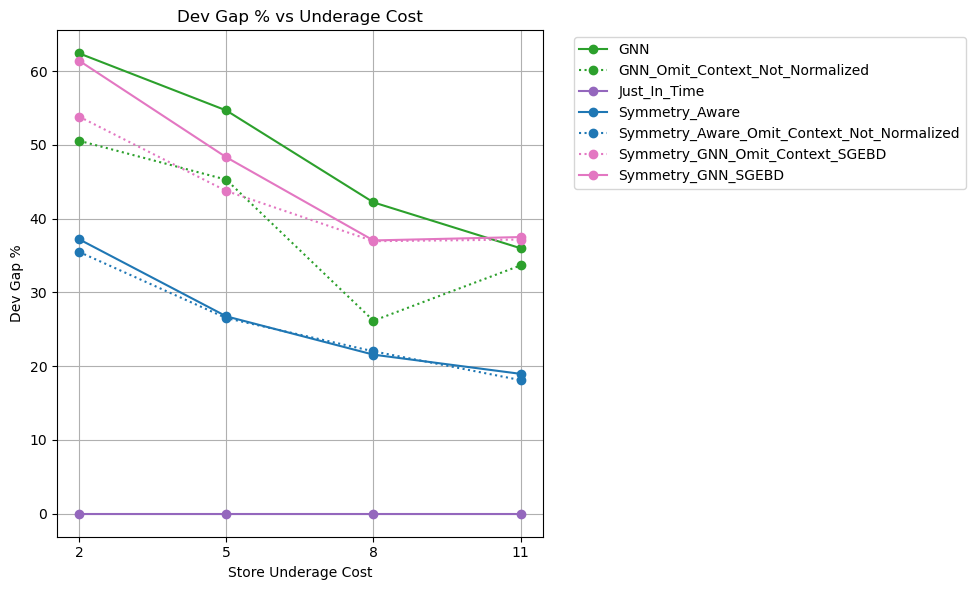

In [104]:
# Define color scheme for architecture types
color_scheme = {
    "Just_In_Time": "#9467bd",  # Purple
    "Transformed_NV": "#8c564b",  # Brown
    "Symmetry_Aware": "#1f77b4",  # Blue solid
    "Symmetry_Aware_Normalized": "#1f77b4",  # Blue dashed
    "Symmetry_Aware_Store_Orders": "#1f77b4",  # Blue dotted
    "Symmetry_Aware_Normalized_Store_Orders": "#1f77b4",  # Blue dash-dot
    "Symmetry_Aware_Decentralized": "#d62728",  # Red solid
    "Symmetry_Aware_Decentralized_Normalized": "#d62728",  # Red dashed
    "Symmetry_Aware_Decentralized_Store_Orders": "#d62728",  # Red dotted
    "Symmetry_Aware_Decentralized_Normalized_Store_Orders": "#d62728",  # Red dash-dot
    "Vanilla": "#ff7f0e",  # Orange solid
    "Vanilla_Normalized": "#ff7f0e",  # Orange dashed
    "GNN": "#2ca02c",  # Green solid
    "GNN_Normalized": "#2ca02c",  # Green dashed
    "GNN_Store_Orders": "#2ca02c",  # Green dotted
    "GNN_Normalized_Store_Orders": "#2ca02c",  # Green dash-dot
    "Symmetry_Aware_Omit_Context": "#1f77b4",  # Blue solid
    "Symmetry_Aware_Omit_Context_Not_Normalized": "#1f77b4",  # Blue dotted
    "GNN_Omit_Context": "#2ca02c",  # Green solid
    "GNN_Omit_Context_Not_Normalized": "#2ca02c",  # Green dotted
    "Symmetry_GNN_SGEBD": "#e377c2",  # Pink solid
    "Symmetry_GNN_Omit_Context_SGEBD": "#e377c2"  # Pink solid
}

linestyle_scheme = {
    "Just_In_Time": "-",
    "Transformed_NV": "-",
    "Symmetry_Aware": "-",
    "Symmetry_Aware_Normalized": "--",
    "Symmetry_Aware_Store_Orders": ":",
    "Symmetry_Aware_Normalized_Store_Orders": "-.",
    "Symmetry_Aware_Decentralized": "-",
    "Symmetry_Aware_Decentralized_Normalized": "--",
    "Symmetry_Aware_Decentralized_Store_Orders": ":",
    "Symmetry_Aware_Decentralized_Normalized_Store_Orders": "-.",
    "Vanilla": "-",
    "Vanilla_Normalized": "--",
    "GNN": "-",
    "GNN_Normalized": "--",
    "GNN_Store_Orders": ":",
    "GNN_Normalized_Store_Orders": "-.",
    "Symmetry_Aware_Omit_Context": "-",
    "Symmetry_Aware_Omit_Context_Not_Normalized": ":",
    "GNN_Omit_Context": "-",
    "GNN_Omit_Context_Not_Normalized": ":",
    "Symmetry_GNN_SGEBD": "-",
    "Symmetry_GNN_Omit_Context_SGEBD": ":"
}

real_path = 'warehouse_real_fixed_stores'
just_in_time_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/just_in_time',
}
symmetry_aware_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/symmetry_aware',
}
symmetry_aware_omit_context_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/symmetry_aware_omit_context_from_store',
}
vanilla_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/vanilla',
}
gnn_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/GNN',
}
gnn_omit_context_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/GNN_omit_context_from_store',
}
symmetry_aware_decentralized_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/symmetry_aware_decentralized',
}
symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/GNN_omit_context_from_store_sgebd',
}
transformed_nv_paths = {
    46: f'/user/ml4723/Prj/NIC/ray_results/{real_path}/transformed_nv',
}

def custom_data_filler(out_row, reference_row):
    out_row['path'] = reference_row['path']

def make_table():
    sort_by = 'dev_loss'
    pick_row_from_run_by = 'dev_loss'

    store_underage_cost = [2, 5, 8, 11]
    results_interpretor = rri.RayResultsinterpreter()

    # Just in time (no variants)
    df_just_in_time = results_interpretor.make_table(just_in_time_paths, {'store_underage_cost': store_underage_cost}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_just_in_time.insert(1, 'Architecture Class', "Just_In_Time")
    df_just_in_time.insert(1, 'hyperparam_name', "just_in_time_real_fixed_stores")

    # Transformed NV (no variants)
    df_transformed_nv = results_interpretor.make_table(transformed_nv_paths, {'store_underage_cost': store_underage_cost}, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_transformed_nv.insert(1, 'Architecture Class', "Transformed_NV")
    df_transformed_nv.insert(1, 'hyperparam_name', "transformed_nv_one_warehouse_real_fixed_stores")

    # Symmetry Aware (4 variants)
    df_symmetry_aware = results_interpretor.make_table(symmetry_aware_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware.insert(1, 'Architecture Class', "Symmetry_Aware")
    df_symmetry_aware.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores")

    df_symmetry_aware_normalized = results_interpretor.make_table(symmetry_aware_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True], 'store_orders_for_warehouse': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_normalized.insert(1, 'Architecture Class', "Symmetry_Aware_Normalized")
    df_symmetry_aware_normalized.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores")

    df_symmetry_aware_store_orders = results_interpretor.make_table(symmetry_aware_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_store_orders.insert(1, 'Architecture Class', "Symmetry_Aware_Store_Orders")
    df_symmetry_aware_store_orders.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores")

    df_symmetry_aware_normalized_store_orders = results_interpretor.make_table(symmetry_aware_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True], 'store_orders_for_warehouse': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_normalized_store_orders.insert(1, 'Architecture Class', "Symmetry_Aware_Normalized_Store_Orders")
    df_symmetry_aware_normalized_store_orders.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores")

    # Symmetry Aware Omit Context
    df_symmetry_aware_omit_context = results_interpretor.make_table(symmetry_aware_omit_context_paths,
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True]},
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_omit_context.insert(1, 'Architecture Class', "Symmetry_Aware_Omit_Context")
    df_symmetry_aware_omit_context.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores_omit_context_from_store")

    df_symmetry_aware_omit_context_not_normalized = results_interpretor.make_table(symmetry_aware_omit_context_paths,
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False]},
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_omit_context_not_normalized.insert(1, 'Architecture Class', "Symmetry_Aware_Omit_Context_Not_Normalized")
    df_symmetry_aware_omit_context_not_normalized.insert(1, 'hyperparam_name', "symmetry_aware_real_fixed_stores_omit_context_from_store")

    # Symmetry Aware Decentralized (4 variants)
    df_symmetry_aware_decentralized = results_interpretor.make_table(symmetry_aware_decentralized_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_decentralized.insert(1, 'Architecture Class', "Symmetry_Aware_Decentralized")
    df_symmetry_aware_decentralized.insert(1, 'hyperparam_name', "symmetry_aware_decentralized_real_fixed_stores")

    df_symmetry_aware_decentralized_normalized = results_interpretor.make_table(symmetry_aware_decentralized_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True], 'store_orders_for_warehouse': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_decentralized_normalized.insert(1, 'Architecture Class', "Symmetry_Aware_Decentralized_Normalized")
    df_symmetry_aware_decentralized_normalized.insert(1, 'hyperparam_name', "symmetry_aware_decentralized_real_fixed_stores")

    df_symmetry_aware_decentralized_store_orders = results_interpretor.make_table(symmetry_aware_decentralized_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_decentralized_store_orders.insert(1, 'Architecture Class', "Symmetry_Aware_Decentralized_Store_Orders")
    df_symmetry_aware_decentralized_store_orders.insert(1, 'hyperparam_name', "symmetry_aware_decentralized_real_fixed_stores")

    df_symmetry_aware_decentralized_normalized_store_orders = results_interpretor.make_table(symmetry_aware_decentralized_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True], 'store_orders_for_warehouse': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_aware_decentralized_normalized_store_orders.insert(1, 'Architecture Class', "Symmetry_Aware_Decentralized_Normalized_Store_Orders")
    df_symmetry_aware_decentralized_normalized_store_orders.insert(1, 'hyperparam_name', "symmetry_aware_decentralized_real_fixed_stores")

    # GNN (4 variants + omit context variant)
    df_gnn = results_interpretor.make_table(gnn_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn.insert(1, 'Architecture Class', "GNN")
    df_gnn.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores")

    df_gnn_normalized = results_interpretor.make_table(gnn_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True], 'store_orders_for_warehouse': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn_normalized.insert(1, 'Architecture Class', "GNN_Normalized")
    df_gnn_normalized.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores")

    df_gnn_store_orders = results_interpretor.make_table(gnn_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn_store_orders.insert(1, 'Architecture Class', "GNN_Store_Orders")
    df_gnn_store_orders.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores")

    df_gnn_normalized_store_orders = results_interpretor.make_table(gnn_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True], 'store_orders_for_warehouse': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn_normalized_store_orders.insert(1, 'Architecture Class', "GNN_Normalized_Store_Orders")
    df_gnn_normalized_store_orders.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores")

    df_gnn_omit_context = results_interpretor.make_table(gnn_omit_context_paths,
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True]},
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn_omit_context.insert(1, 'Architecture Class', "GNN_Omit_Context")
    df_gnn_omit_context.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores_omit_context_from_store")

    df_gnn_omit_context_not_normalized = results_interpretor.make_table(gnn_omit_context_paths,
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False]},
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_gnn_omit_context_not_normalized.insert(1, 'Architecture Class', "GNN_Omit_Context_Not_Normalized")
    df_gnn_omit_context_not_normalized.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores_omit_context_from_store")

    # Vanilla (2 variants)
    df_vanilla = results_interpretor.make_table(vanilla_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [False]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_vanilla.insert(1, 'Architecture Class', "Vanilla")
    df_vanilla.insert(1, 'hyperparam_name', "data_driven_net_real_fixed_stores")

    df_vanilla_normalized = results_interpretor.make_table(vanilla_paths, 
        {'store_underage_cost': store_underage_cost, 'apply_normalization': [True]}, 
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_vanilla_normalized.insert(1, 'Architecture Class', "Vanilla_Normalized")
    df_vanilla_normalized.insert(1, 'hyperparam_name', "data_driven_net_real_fixed_stores")

    df_symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd = results_interpretor.make_table(symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd_paths,
        {'store_underage_cost': store_underage_cost, 'omit_context_from_store_input': [True]},
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd.insert(1, 'Architecture Class', "Symmetry_GNN_Omit_Context_SGEBD")
    df_symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd")

    df_symmetry_GNN_real_fixed_stores_sgebd = results_interpretor.make_table(symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd_paths,
        {'store_underage_cost': store_underage_cost, 'omit_context_from_store_input': [False]},
        custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
    df_symmetry_GNN_real_fixed_stores_sgebd.insert(1, 'Architecture Class', "Symmetry_GNN_SGEBD")
    df_symmetry_GNN_real_fixed_stores_sgebd.insert(1, 'hyperparam_name', "symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd")

    # Combine all dataframes
    df = pd.concat([
        df_just_in_time,
        df_transformed_nv,
        df_symmetry_aware, df_symmetry_aware_normalized, df_symmetry_aware_store_orders, df_symmetry_aware_normalized_store_orders,
        df_symmetry_aware_decentralized, df_symmetry_aware_decentralized_normalized, df_symmetry_aware_decentralized_store_orders, df_symmetry_aware_decentralized_normalized_store_orders,
        df_gnn, df_gnn_normalized, df_gnn_store_orders, df_gnn_normalized_store_orders,
        df_vanilla, df_vanilla_normalized
    ])

    # Combine all dataframes
    df = pd.concat([
        df_just_in_time,
        df_symmetry_aware, df_symmetry_aware_omit_context_not_normalized,
        df_gnn, df_gnn_omit_context_not_normalized,
        df_symmetry_GNN_real_fixed_stores_omit_context_from_store_sgebd, df_symmetry_GNN_real_fixed_stores_sgebd,
        # df_symmetry_aware_store_orders, df_symmetry_aware_decentralized_store_orders, df_gnn_store_orders
    ])

    min_dev_loss = df.groupby(['store_underage_cost'])['Dev Loss'].transform('min')
    df['Dev Gap %'] = -((df['Dev Loss'] - min_dev_loss) / min_dev_loss) * 100
    df.insert(df.columns.get_loc(df.columns[-2]), 'Dev Gap %', df.pop('Dev Gap %'))
    df.drop(columns=['# of stores'], inplace=True)
    df.sort_values(by=['store_underage_cost', 'Architecture Class'], inplace=True)
    cols = df.columns.tolist()
    cols.remove('store_underage_cost')
    cols = ['store_underage_cost'] + cols
    df = df[cols]
    return df

# Call make_table() and plot results
df_fixed = make_table()
df_to_print = df_fixed.copy()
df_to_print.drop(columns=['hyperparam_name', 'Learning Rate', 'apply_normalization', 'store_orders_for_warehouse'], inplace=True)
# Calculate overfitting metric (difference between train and dev loss)

print(df_to_print.to_string())
# Create the plot for fixed case
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Dev Gap %
pivot_df_fixed_dev = df_fixed.pivot(index='store_underage_cost', columns='Architecture Class', values='Dev Gap %')
for column in pivot_df_fixed_dev.columns:
    ax.plot(pivot_df_fixed_dev.index, pivot_df_fixed_dev[column], 
            marker='o', 
            label=column, 
            color=color_scheme[column],
            linestyle=linestyle_scheme[column])

ax.set_xlabel('Store Underage Cost')
ax.set_ylabel('Dev Gap %')
ax.set_title('Dev Gap % vs Underage Cost')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
ax.set_xticks(pivot_df_fixed_dev.index)

plt.tight_layout()
plt.show()

In [47]:
# Initialize variables

results_interpretor = rri.RayResultsinterpreter()
store_underage_cost = [2, 5, 8, 11]
sort_by = 'dev_loss'
pick_row_from_run_by = 'dev_loss'

def custom_data_filler(out_row, reference_row):
    out_row['path'] = reference_row['path']
test_df = results_interpretor.make_table({1: "/user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/GNN/1"}, 
    {'store_underage_cost': store_underage_cost, 
        'apply_normalization': [True, False],
        'learning_rate': [0.01, 0.001, 0.0001],
        'samples': [1, 2, 3, 4, 5]}, 
    custom_data_filler, sort_by='dev_loss', pick_row_from_run_by='dev_loss')
test_df.drop(columns=['apply_normalization', 'learning_rate'], inplace=True)
# Rename samples column to sample_idx
test_df = test_df.rename(columns={'samples': 'sample_idx'})

# Count rows where absolute train loss is less than 0.01
count_small_loss = len(test_df[abs(test_df['Train Loss']) < 0.0001])
total_rows = len(test_df)
print(f"\nNumber of rows with |train_loss| < 0.01: {count_small_loss} out of {total_rows} total rows ({count_small_loss/total_rows*100:.1f}%)")

print(test_df.to_string())


Number of rows with |train_loss| < 0.01: 58 out of 109 total rows (53.2%)
     # of stores  store_underage_cost  sample_idx  Learning Rate  Train Loss    Dev Loss  # of runs                                                                                                                                                                                                                                               path
0              1                    2           1         0.0001  -71.410750  -57.745953          2  /user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/GNN/1/run_2024-11-05_23-07-30/run_a4308_00005_5_apply_normalization=False,learning_rate=0.0001,samples=1,store_orders_for_warehouse=False,store_underage_cost=2,_2024-11-05_23-07-30
1              1                    2           2         0.0001  -72.271557  -58.582936          2  /user/ml4723/Prj/NIC/ray_results/warehouse_real_fixed_stores/GNN/1/run_2024-11-05_23-07-30/run_a4308_00011_11_apply_normalization=False,le

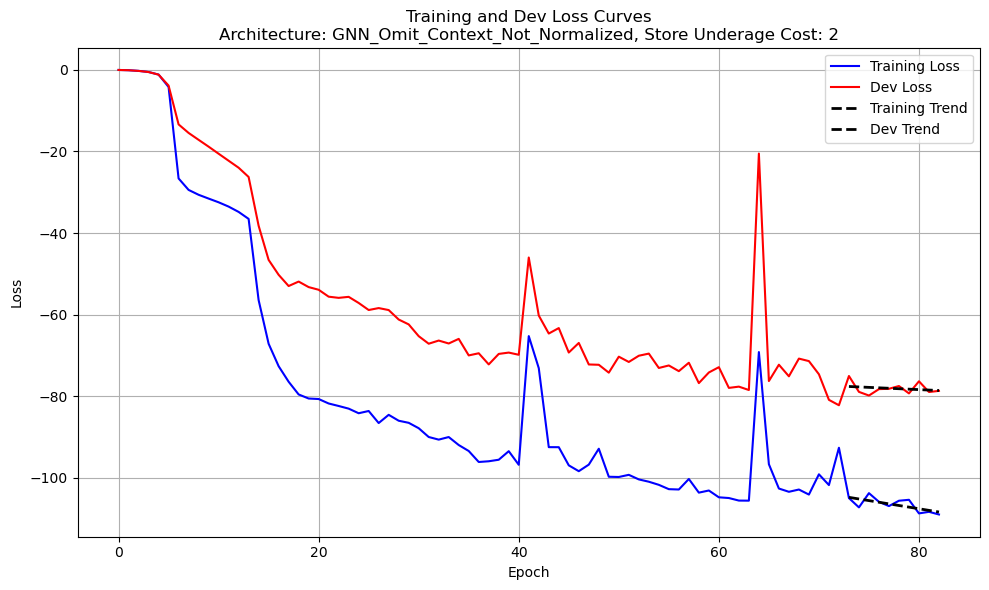

In [42]:
# Function to plot training and dev loss curves for selected model
def plot_training_curves(store_underage_cost, architecture_class):
    # Get the corresponding row from df_fixed
    selected_row = df_fixed[
        (df_fixed['store_underage_cost'] == store_underage_cost) & 
        (df_fixed['Architecture Class'] == architecture_class)
    ]
    
    if len(selected_row) == 0:
        print("No model found with the specified parameters")
        return
        
    # Get the path from the selected row
    model_path = selected_row['path'].iloc[0]
    progress_path = os.path.join(model_path, 'progress.csv')
    
    if not os.path.exists(progress_path):
        print(f"Progress file not found at {progress_path}")
        return
        
    # Read and plot the training curves
    progress_df = pd.read_csv(progress_path)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(progress_df['train_loss'], label='Training Loss', color='blue')
    ax.plot(progress_df['dev_loss'], label='Dev Loss', color='red')
    
    # Add trend lines based on last 10 points
    last_10_epochs = range(len(progress_df)-10, len(progress_df))
    train_z = np.polyfit(last_10_epochs, progress_df['train_loss'].iloc[-10:], 1)
    dev_z = np.polyfit(last_10_epochs, progress_df['dev_loss'].iloc[-10:], 1)
    train_p = np.poly1d(train_z)
    dev_p = np.poly1d(dev_z)
    
    ax.plot(last_10_epochs, train_p(last_10_epochs), '--', color='black', alpha=1.0, label='Training Trend', linewidth=2)
    ax.plot(last_10_epochs, dev_p(last_10_epochs), '--', color='black', alpha=1.0, label='Dev Trend', linewidth=2)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Training and Dev Loss Curves\nArchitecture: {architecture_class}, Store Underage Cost: {store_underage_cost}')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
# plot_training_curves(store_underage_cost=2, architecture_class='GNN_Omit_Context_Not_Normalized')

In [56]:
def collect_data_and_plot(df, test_mode, setting_name, x_axis_value):
    def run_main_run(row):
        try:
            cmd = [
                "/user/ml4723/.conda/envs/neural_inventory_control/bin/python",
                "main_run.py",
                test_mode, # test or test_on_dev
                setting_name,
                row['hyperparam_name'],
                row['path'],
                row['Architecture Class']
            ]
            env = {
                **os.environ,
                "MKL_THREADING_LAYER": "GNU",
                "MKL_SERVICE_FORCE_INTEL": "1"
            }
            subprocess.run(cmd, capture_output=True, text=True, check=True, env=env, cwd="/user/ml4723/Prj/NIC/")
        except subprocess.CalledProcessError as e:
            print(f"Error running main_run.py for path {row['path']}: {e}")
            print(f"Error output: {e.stderr}")
        except Exception as e:
            print(f"Unexpected error running main_run.py for path {row['path']}: {e}")

    def get_file_name(row):
        return f"results/one_warehouse_real/{row['Architecture Class']}/{row['store_underage_cost']}.csv"
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        futures = []
        for _, row in df.iterrows():
            file_name = get_file_name(row)
            if os.path.exists(file_name):
                continue
            while len(futures) >= 8:
                done, not_done = concurrent.futures.wait(
                    futures, 
                    return_when=concurrent.futures.FIRST_COMPLETED
                )
                futures = list(not_done)
            futures.append(executor.submit(run_main_run, row))
        concurrent.futures.wait(futures)
    
    avg_s_underage = []
    avg_s_holding = []
    avg_w_holding = []
    avg_profit = []
    for _, row in df.iterrows():
        file_name = get_file_name(row)
        data = pd.read_csv(file_name)
        n_samples = 109
        batch_size = 109
        num_batches = n_samples // batch_size
        num_steps = 50
        start_step = 16
        n_stores = 46
        
        relevant_indices = []
        for batch in range(num_batches):
            batch_start = batch * batch_size * num_steps
            step_start = batch_start + start_step * batch_size
            step_end = batch_start + num_steps * batch_size
            relevant_indices.extend(range(step_start, step_end))
        
        relevant_data = data.iloc[relevant_indices]
        
        avg_s_underage.append(-relevant_data['s_underage_costs'].mean() / row['store_underage_cost'])
        avg_s_holding.append(relevant_data['s_holding_costs'].mean() / row['store_underage_cost'])
        avg_w_holding.append(relevant_data['w_holding_costs'].mean() / row['store_underage_cost'])
        avg_profit.append(-relevant_data['s_underage_costs'].sum() * n_stores - relevant_data['s_holding_costs'].sum() * n_stores - relevant_data['w_holding_costs'].sum())

    df['avg_s_underage'] = avg_s_underage
    df['avg_s_holding'] = avg_s_holding
    df['avg_w_holding'] = avg_w_holding
    df['avg_profit'] = avg_profit

    # Calculate relative profit
    just_in_time_profits = df[df['Architecture Class'] == 'Just_In_Time'].set_index('store_underage_cost')['avg_profit']
    df['relative_profit'] = df.apply(lambda row: (row['avg_profit'] / just_in_time_profits[row['store_underage_cost']]) * 100, axis=1)

    plot_data = df.pivot(index=x_axis_value, columns='Architecture Class', 
                         values=['relative_profit', 'avg_s_underage', 'avg_s_holding', 'avg_w_holding'])
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration
    titles = ['Profit % relative to Just_In_Time', 'Store Revenue / (average unit underage cost)', 'Store Holding Cost / (average unit underage cost)', 'Warehouse Holding Cost / (average unit underage cost)']
    y_values = ['relative_profit', 'avg_s_underage', 'avg_s_holding', 'avg_w_holding']

    if x_axis_value == 'store_underage_cost':
        x_values = [2, 5, 8, 11]

    for i, (ax, title, y_value) in enumerate(zip(axes, titles, y_values)):
        for arch in df['Architecture Class'].unique():
            if arch == 'Just_In_Time':
                continue
            if arch in plot_data[y_value].columns:
                ax.plot(x_values, plot_data[y_value][arch].loc[x_values], marker='o', label=f'{arch}', 
                        color=color_scheme[arch], linestyle=linestyle_scheme[arch])
        
        ax.set_xlabel('Average unit underage cost')
        ax.set_ylabel(f'{title}')
        ax.set_title(title)
        ax.legend()
        ax.grid(True)
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_values)
    
    plt.tight_layout()
    plt.show()
    return df


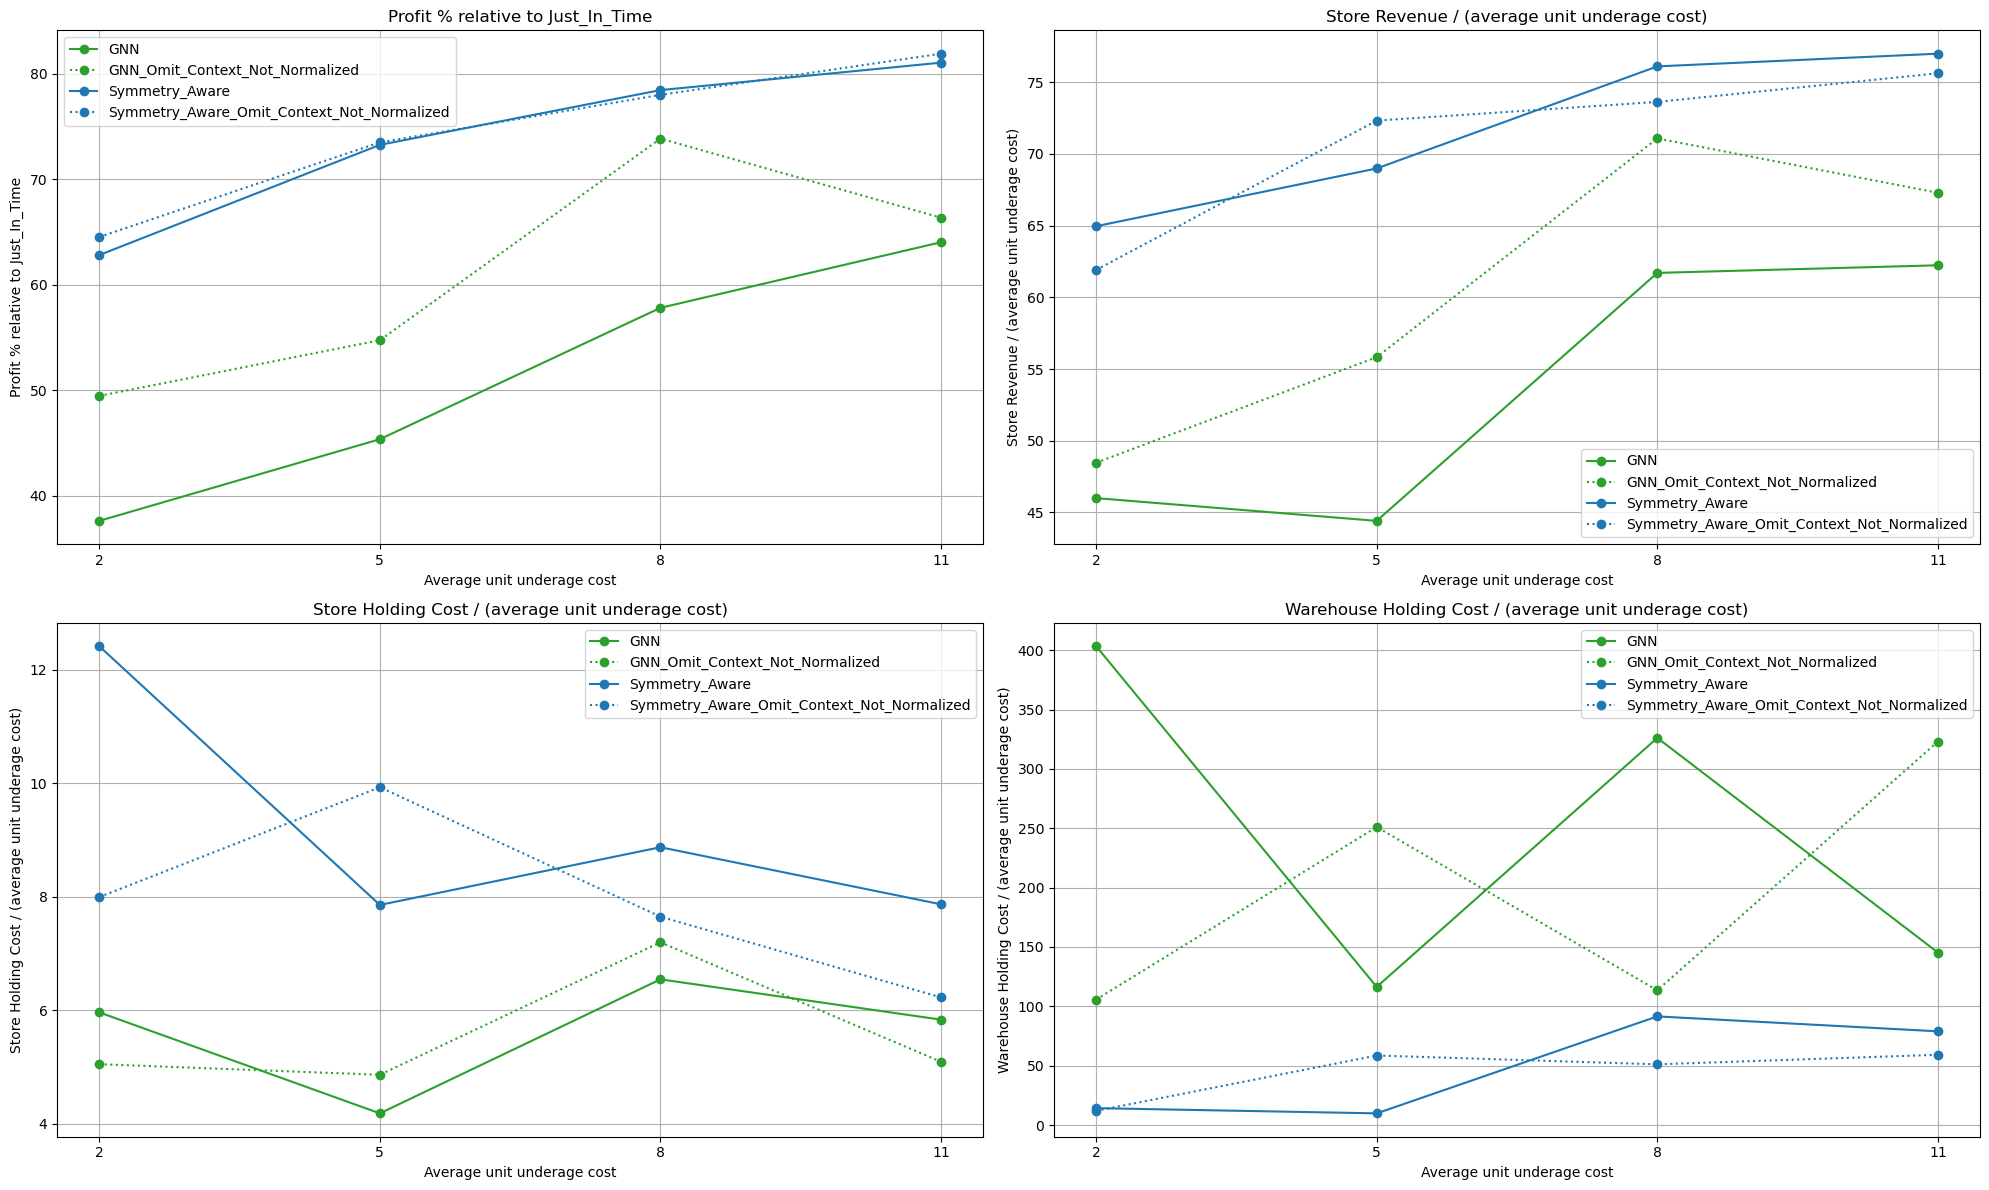

In [57]:
df_t = collect_data_and_plot(df_fixed, "test_on_dev", "one_warehouse_real_lost_demand_fixed_stores", "store_underage_cost")

In [20]:
df_t.drop(columns=['path', 'NN_name', 'hyperparam_name', 'Learning Rate'], inplace=True)

KeyError: "['NN_name'] not found in axis"

In [33]:
print(df_t.to_string())

   store_underage_cost                       Architecture Class  Train Loss    Dev Loss  Dev Gap %  avg_s_underage  avg_s_holding  avg_w_holding    avg_profit  relative_profit
0                    4                           GNN Normalized -178.865371 -163.831201  23.422011       47.663004       4.512440   5.562586e+00  1.025626e+07        76.568739
0                    4                                   Oracle -233.280130 -213.940328   0.000000       55.901950       0.000673   2.200787e-08  1.339484e+07       100.000000
0                    4  Symmetry Aware Decentralized Normalized -178.278600 -162.992594  23.813993       48.417457       5.229909   9.937769e+00  1.019960e+07        76.145733
0                    4                Symmetry Aware Normalized -179.395815 -162.114660  24.224357       48.345911       5.214215   7.953963e+00  1.021593e+07        76.267621
0                    4                       Vanilla Normalized -176.551054 -159.409785  25.488669       46.706514      